In [5]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import dataframe_image as dfi
import os
import seaborn as sns
from IPython.display import display, Markdown, Latex

In [6]:
# Definiciones del script

# Directorio de imagenes
dirImg = './imagenes'



# CSV
csv1 = './data.csv'

In [7]:
# Creamos el directorio de imagenes
if not os.path.exists(dirImg):
	os.mkdir(dirImg)
else :
	os.system("rm -r " + dirImg)
	os.mkdir(dirImg)

In [18]:
# Obtenemos los datos del archivo CSV para un dataset
dataset1 = pd.read_csv(csv1, sep=';')

print("Total rows: {0}".format(len(dataset1)))
dataset1.tail()

Total rows: 3659


,TamanoMatriz,Procesos,Tiempo
3654,6501,58,0.387526
3655,6451,60,0.329811
3656,6551,58,0.327371
3657,6501,60,0.377366
3658,6551,60,0.337039


In [9]:
# Obtenemos los valores unicos de la columna Procesos y N
Procesos = dataset1['Procesos'].unique()
tam = dataset1['TamanoMatriz'].unique()

Procesos = sorted(Procesos)
tam = sorted(tam)

datasetsByCore = []

for p in Procesos:
	for n in tam:
		datasetsByCore.append(dataset1[(dataset1['Procesos'] == p) & (dataset1['TamanoMatriz'] == n)])

print("Valid: " + str(len(Procesos) * len(tam) == len(datasetsByCore)))


Valid: True


In [14]:
finalData = []

min_Procesos = dataset1['Procesos'].min()

ref_dataset = dataset1[dataset1['Procesos'] == min_Procesos]

ref_times = ref_dataset.groupby('TamanoMatriz')['Tiempo'].max()

for (TamañoMatriz_value, Procesos_value), group in dataset1.groupby(['TamanoMatriz', 'Procesos']):

	max_time = group['Tiempo'].max()

	ref_time = ref_times.get(TamañoMatriz_value, None)

	if ref_time and max_time:
		speedup = ref_time / max_time
		efficiency = speedup / (Procesos_value-1) if Procesos_value != 0 else 0
	else:
		speedup = None
		efficiency = None

	finalData.append([Procesos_value, TamañoMatriz_value, max_time, ref_time, speedup, efficiency])


final_df = pd.DataFrame(finalData, columns=['Procesos', 'TamanoMatriz', 'TiempoMaximo', 'TiempoReferencia', 'Speedup', 'Eficiencia'])

display(final_df)
# Filtrar el DataFrame para 64 procesos
procesos_64 = final_df[final_df['Procesos'] == 64]

# Mostrar los resultados
display(procesos_64)


,Procesos,TamanoMatriz,TiempoMaximo,TiempoReferencia,Speedup,Eficiencia
0,2,1,0.029862,0.029862,1.000000,1.000000
1,4,1,0.022497,0.029862,1.327377,0.442459
2,6,1,0.024889,0.029862,1.199807,0.239961
3,8,1,0.000917,0.029862,32.564885,4.652126
4,10,1,0.023554,0.029862,1.267810,0.140868
...,...,...,...,...,...,...
3654,40,6551,0.308867,3.903344,12.637621,0.324042
3655,52,6551,0.319937,3.903344,12.200352,0.239223
3656,54,6551,0.303746,3.903344,12.850684,0.242466
3657,58,6551,0.327371,3.903344,11.923304,0.209181


,Procesos,TamanoMatriz,TiempoMaximo,TiempoReferencia,Speedup,Eficiencia
31,64,1,0.007660,0.029862,3.898433,0.061880
63,64,51,0.018242,0.032341,1.772887,0.028141
95,64,101,0.049467,0.031838,0.643621,0.010216
127,64,151,0.044278,0.032187,0.726930,0.011539
159,64,201,0.082738,0.031962,0.386304,0.006132
...,...,...,...,...,...,...
3096,64,4801,0.611809,0.241556,0.394823,0.006267
3128,64,4851,0.539136,0.251661,0.466786,0.007409
3160,64,4901,0.565446,0.256505,0.453633,0.007201
3192,64,4951,0.585018,0.257666,0.440441,0.006991


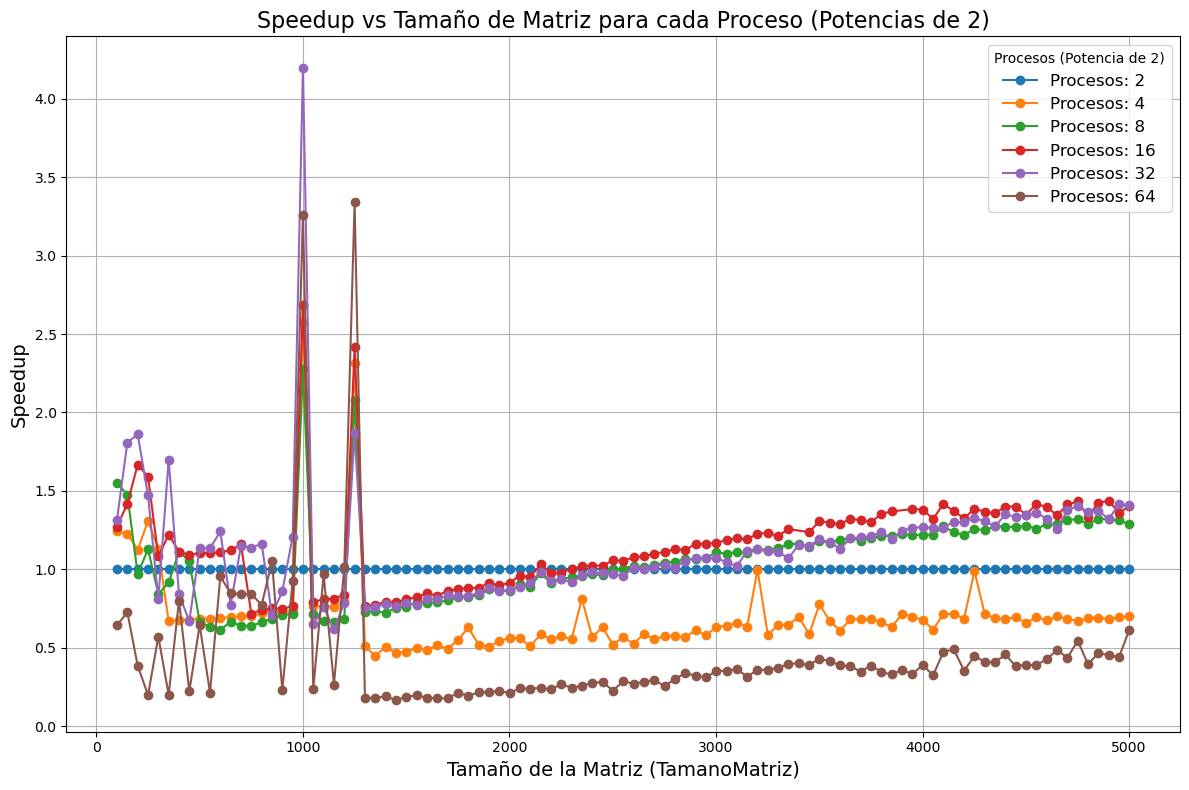

In [13]:
# Filtrar el DataFrame para eliminar tamaños de matriz menores a 100
filtered_df = final_df[(final_df['TamanoMatriz'] >= 100) & (final_df['Procesos'] > 0) & (final_df['TamanoMatriz'] <= 5001)]

# Función para verificar si un número es potencia de 2
def is_power_of_two(n):
    return (n & (n - 1)) == 0

# Filtrar procesos que sean potencias de 2
filtered_df = filtered_df[filtered_df['Procesos'].apply(is_power_of_two)]

# Configura el tamaño de la figura
plt.figure(figsize=(12, 8))

# Grafica una línea para cada valor único en 'Procesos'
for proceso in filtered_df['Procesos'].unique():
    # Filtra los datos para el proceso actual
    proceso_df = filtered_df[filtered_df['Procesos'] == proceso]
    # Ordena los datos por TamanoMatriz (opcional, pero recomendado para gráficos claros)
    proceso_df = proceso_df.sort_values(by='TamanoMatriz')
    # Grafica la línea
    plt.plot(proceso_df['TamanoMatriz'], proceso_df['Speedup'], marker='o', label=f'Procesos: {proceso}')

# Agregar título, etiquetas y leyenda
plt.title('Speedup vs Tamaño de Matriz para cada Proceso (Potencias de 2)', fontsize=16)
plt.xlabel('Tamaño de la Matriz (TamanoMatriz)', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.legend(title='Procesos (Potencia de 2)', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
# Ajustamos algun dato que falle

# prevOne = final_df.loc[(final_df['Process'] == 43) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]
# nextOne = final_df.loc[(final_df['Process'] == 45) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]

# final_df.loc[(final_df['Process'] == 44) & (final_df['nTrap'] == 1), 'Efficiency'] = (prevOne + nextOne) / 2

# prevOne = final_df.loc[(final_df['Process'] == 7) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]
# nextOne = final_df.loc[(final_df['Process'] == 9) & (final_df['nTrap'] == 1), 'Efficiency'].values[0]

# final_df.loc[(final_df['Process'] == 8) & (final_df['nTrap'] == 1), 'Efficiency'] = (prevOne + nextOne) / 2

In [15]:
# Filtrar el DataFrame para eliminar los valores de 'Procesos' impares
filtered_df = final_df[final_df['Procesos'] % 2 == 0]

# Crear la matriz de eficiencia usando el DataFrame filtrado
efficiency_matrix = filtered_df.pivot(index='Procesos', columns='TamanoMatriz', values='Eficiencia')
efficiency_matrix

TamanoMatriz,1,51,101,151,201,251,301,351,401,451,...,6101,6151,6201,6251,6301,6351,6401,6451,6501,6551
Procesos,,,,,,,,,,,,,,,,,,,,,
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.442459,0.376777,0.413894,0.409207,0.375233,0.435769,0.377101,0.222634,0.226478,0.226568,...,1.391817,1.458015,0.837597,0.826464,0.485168,0.495777,0.486506,0.482823,0.433645,3.436566
6,0.239961,0.220939,0.181641,0.173613,0.181376,0.184576,0.220697,0.225081,0.224798,0.135327,...,0.865863,0.915465,0.518334,0.512035,0.303701,0.310836,0.305570,0.301077,0.269920,2.147580
8,4.652126,0.120649,0.221943,0.210634,0.138616,0.161325,0.120384,0.130979,0.158705,0.150400,...,0.714331,0.764296,0.436340,0.415227,0.247141,0.256226,0.251621,0.248058,0.221481,1.775698
10,0.140868,0.126780,0.120992,0.096048,0.095202,0.098242,0.149070,0.111343,0.105414,0.121905,...,0.572715,0.606682,0.345517,0.327592,0.195968,0.203759,0.194832,0.198189,0.173446,1.399540
12,0.202516,0.111300,0.082296,0.087613,0.082315,0.098916,0.076202,0.093579,0.089600,0.091319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,0.233656,0.075428,0.070483,0.090385,0.076492,0.080201,0.071850,0.082266,0.073712,0.074525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,2.529606,0.090943,0.084756,0.094562,0.111164,0.106078,0.072143,0.081465,0.074199,0.072798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,0.490119,0.082373,0.081629,0.080074,0.061410,0.077773,0.105850,0.075397,0.064654,0.064310,...,0.286668,0.305174,0.173329,0.165515,0.099959,0.103544,0.099794,0.098828,0.086916,0.708349


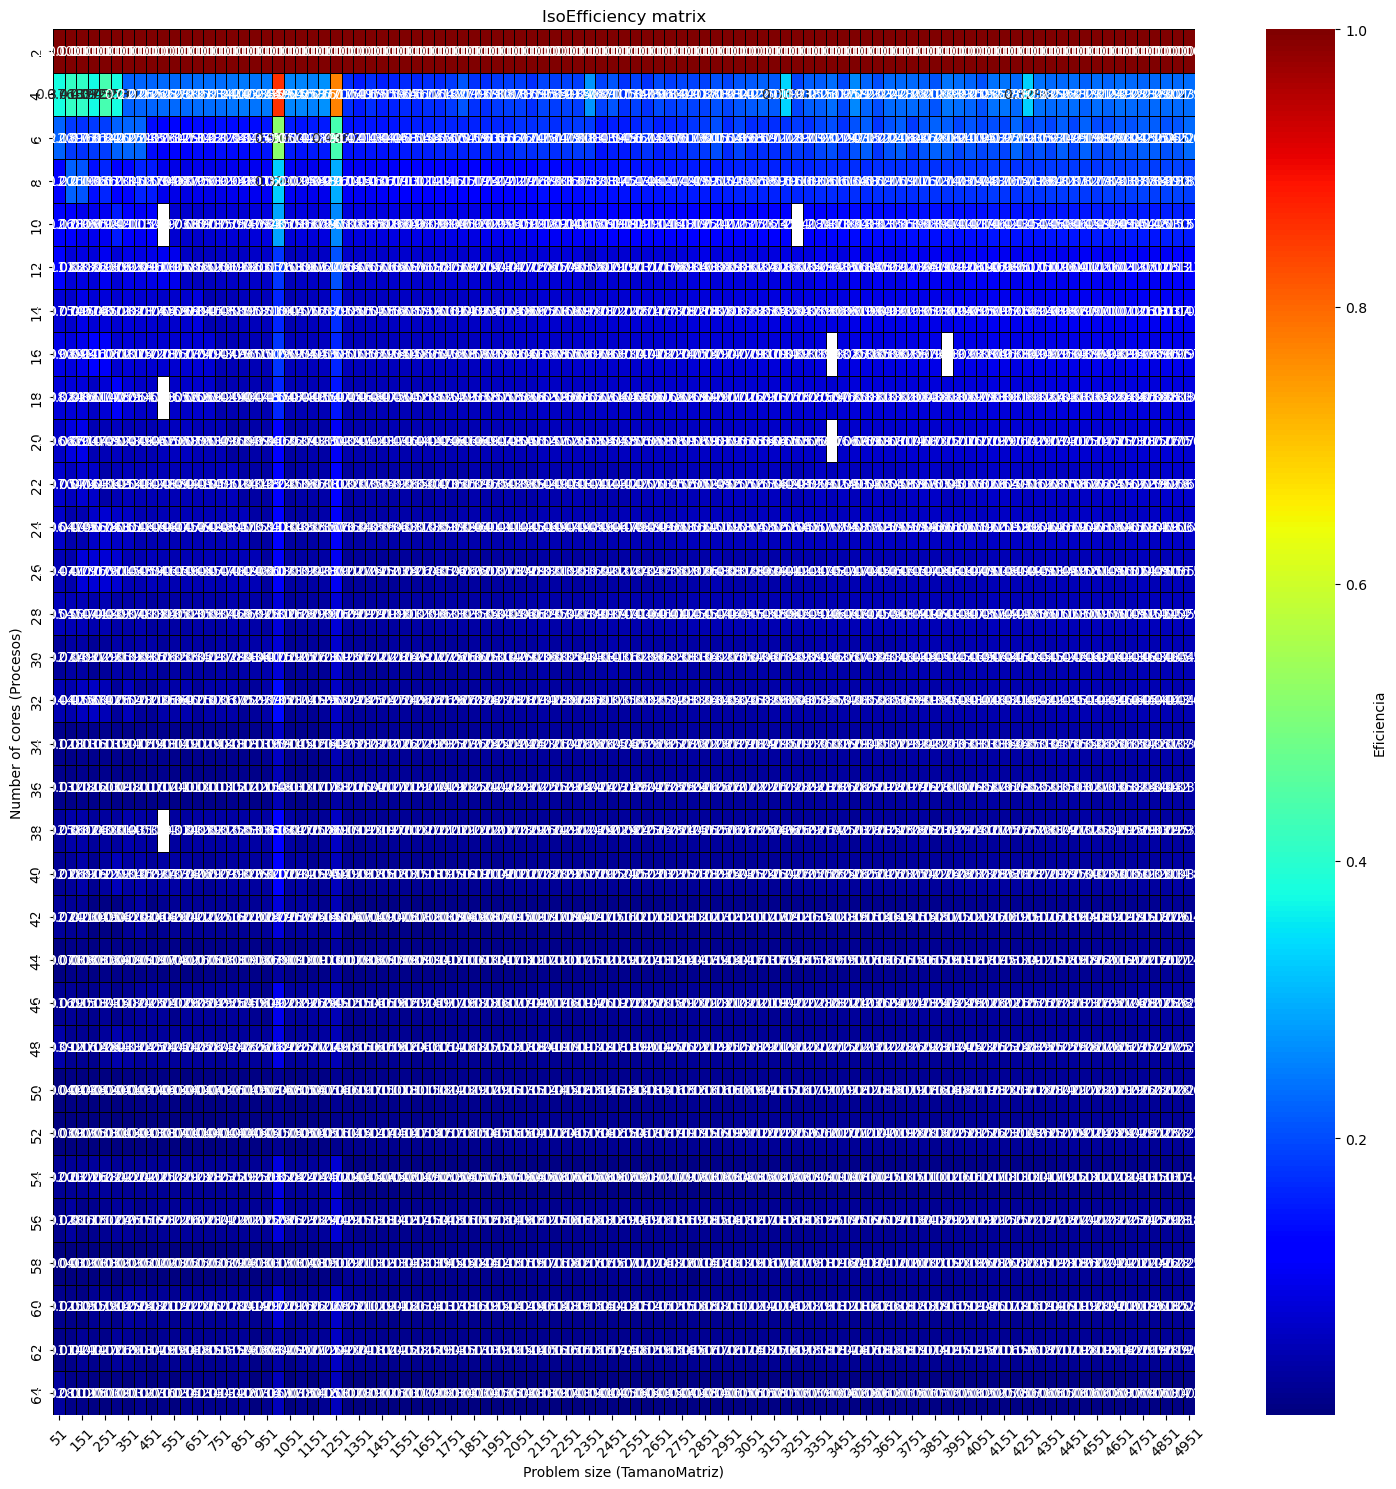

In [19]:
# Filtrar el DataFrame para eliminar los valores de 'Procesos' impares y 'TamanoMatriz' mayores a 4951
filtered_df = final_df[(final_df['Procesos'] % 2 == 0) & (final_df['TamanoMatriz'] <= 4951) & (final_df['TamanoMatriz'] > 1)]
# Crear la matriz de eficiencia usando el DataFrame filtrado
efficiency_matrix = filtered_df.pivot(index='Procesos', columns='TamanoMatriz', values='Eficiencia')

# Eliminar las columnas (TamanoMatriz) que no tienen datos (todos los valores NaN)
efficiency_matrix = efficiency_matrix.dropna(axis=1, how='all')

# Configura el tamaño de la figura
plt.figure(figsize=(15, 15))

# Usa el heatmap de Seaborn
ax = sns.heatmap(efficiency_matrix, annot=True, fmt=".4f", cmap='jet', cbar_kws={'label': 'Eficiencia'}, linewidths=0.5, linecolor='black')

# Agrega títulos y etiquetas
ax.set_title("IsoEfficiency matrix")
ax.set_xlabel("Problem size (TamanoMatriz)")
ax.set_ylabel("Number of cores (Procesos)")

# Rotación de las etiquetas de eje X para mayor claridad
plt.xticks(rotation=45)

# Guarda y muestra la figura
plt.tight_layout()
plt.savefig(f'{dirImg}/iso_efficiency_matrix.png')
plt.show()


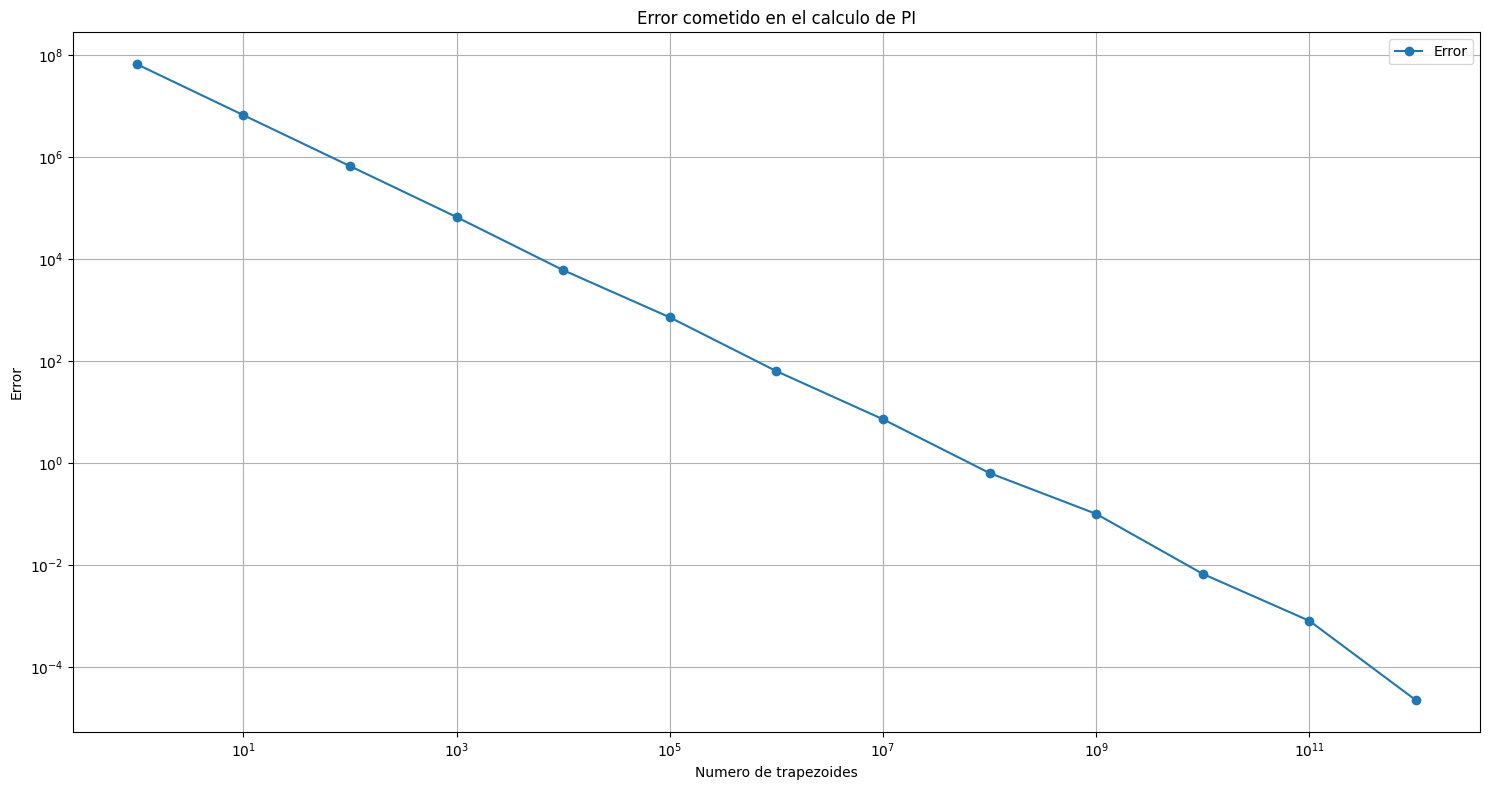

In [10]:
# Graficamos el error cometido en el calculo de PI para cada valor de N

# Filtramos los los valores que tengan un valor de -1 en la columna Diff y para el proceso 1
tempData = final_df[(final_df['Process'] == 64)]

# Valores de N
xValues = tempData['nTrap']
yValues = tempData['Error']

plt.figure(figsize=(15, 8))

plt.plot(xValues, yValues, marker='o', label='Error')

plt.xscale('log')
plt.yscale('log')

plt.title('Error cometido en el calculo de PI')
plt.xlabel('Numero de trapezoides')
plt.ylabel('Error')

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(dirImg + '/error.{0}.png'.format(mode))

plt.show()


In [11]:
# Dame los datos de final_df para Process = 9 y 64
final_df_9 = final_df[final_df['Process'] == 9]
final_df_64 = final_df[final_df['Process'] == 64]

display(final_df_9)
display(final_df_64)

,Process,nTrap,MaxTime,RefTime,Speedup,Efficiency,Error,Quality
8,9,1,0.028185,0.000002,0.000071,0.000008,6.710886e+07,5.286912e-07
72,9,10,0.028219,0.000002,0.000071,0.000008,6.710885e+06,5.280543e-06
136,9,100,0.028122,0.000004,0.000142,0.000016,6.710883e+05,5.298758e-05
200,9,1000,0.028058,0.000020,0.000713,0.000079,6.710877e+04,5.310850e-04
264,9,10000,0.028171,0.000185,0.006567,0.000730,6.095122e+03,5.823919e-03
328,9,100000,0.161659,0.001846,0.011419,0.001269,7.229883e+02,8.555962e-03
392,9,1000000,0.030277,0.018321,0.605113,0.067235,6.356351e+01,5.196122e-01
456,9,10000000,0.047616,0.180080,3.781922,0.420214,7.229052e+00,2.905131e+00
520,9,100000000,0.227863,1.797575,7.888841,0.876538,6.353722e-01,6.907135e+00
584,9,1000000000,2.021912,17.954740,8.880080,0.986676,1.005710e-01,4.917734e+00


,Process,nTrap,MaxTime,RefTime,Speedup,Efficiency,Error,Quality
63,64,1,0.048530,0.000002,0.000041,6.439316e-07,6.710886e+07,3.070505e-07
127,64,10,0.047803,0.000002,0.000042,6.537247e-07,6.710885e+06,3.117203e-06
191,64,100,0.048456,0.000004,0.000083,1.289830e-06,6.710883e+05,3.075196e-05
255,64,1000,0.048540,0.000020,0.000412,6.437989e-06,6.710877e+04,3.069877e-04
319,64,10000,0.040643,0.000185,0.004552,7.112233e-05,6.095122e+03,4.036750e-03
383,64,100000,0.048452,0.001846,0.038100,5.953057e-04,7.229883e+02,2.854677e-02
447,64,1000000,0.040593,0.018321,0.451334,7.052093e-03,6.356351e+01,3.875618e-01
511,64,10000000,0.032173,0.180080,5.597240,8.745687e-02,7.229052e+00,4.299591e+00
575,64,100000000,0.066759,1.797575,26.926332,4.207239e-01,6.353722e-01,2.357556e+01
639,64,1000000000,0.310908,17.954740,57.749366,9.023338e-01,1.005710e-01,3.198124e+01


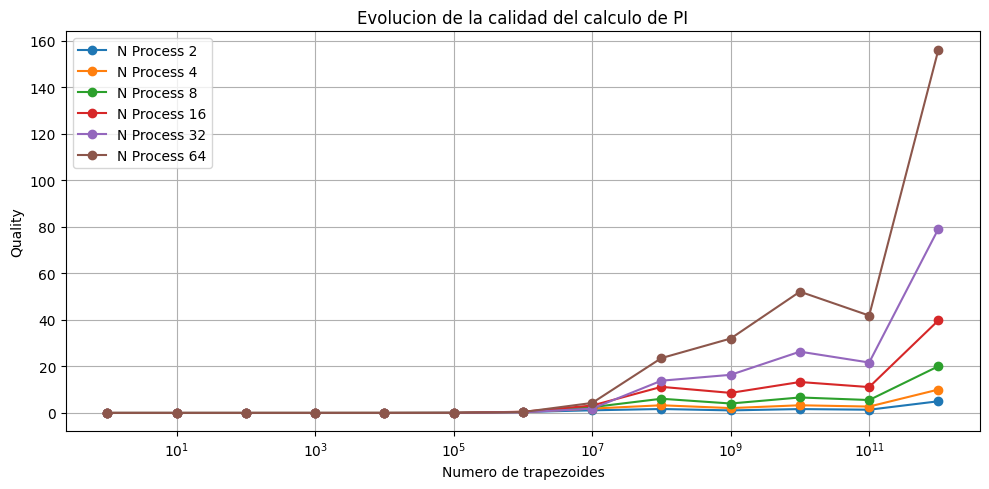

In [12]:
# Grafica la evolucion de la calidad del calculo de PI en funcion del numero de trapezoides para cada numero de procesos
# Usar solo los valores de process potencia de 2

temp_process = [2, 4, 8, 16, 32, 64]

plt.figure(figsize=(10, 5))

for i in range(len(temp_process)):

	tempData = final_df[(final_df['Process'] == temp_process[i])]

	xValues = tempData['nTrap']
	yValues = tempData['Quality']

	plt.plot(xValues, yValues, marker='o', label='N Process ' + str(temp_process[i]))

plt.xscale('log')

plt.title('Evolucion de la calidad del calculo de PI')
plt.xlabel('Numero de trapezoides')
plt.ylabel('Quality')

plt.legend()
plt.grid()
plt.tight_layout()

plt.savefig(dirImg + '/quality.{0}.png'.format(mode))

plt.show()

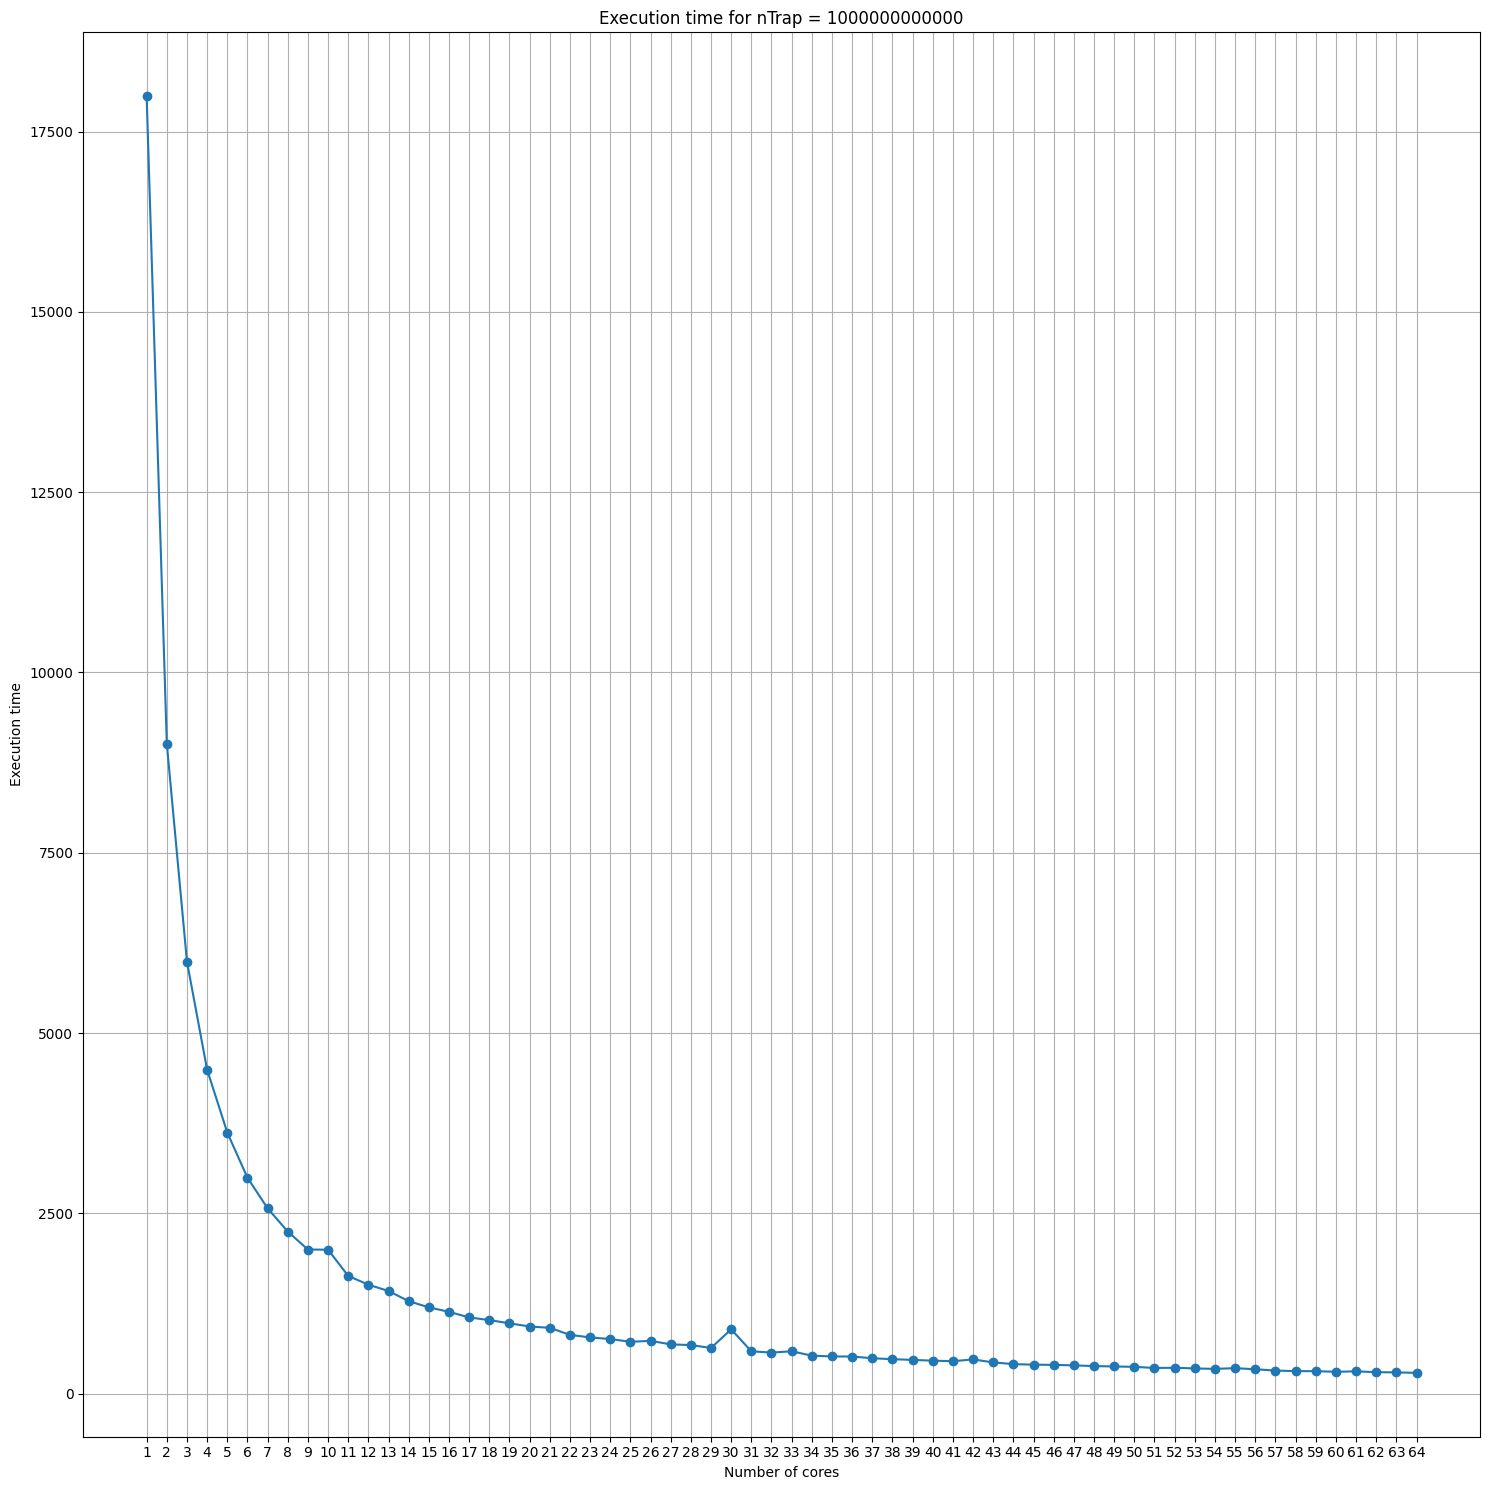

In [13]:
plt.figure(figsize=(15, 15))

maxN = final_df['nTrap'].max()

xvalues = range(len(process))
yvalues = final_df[final_df['nTrap'] == maxN]['MaxTime']

plt.plot(xvalues, yvalues, marker='o')

plt.title('Execution time for nTrap = ' + str(maxN))
plt.xlabel('Number of cores')
plt.ylabel('Execution time')

plt.xticks(xvalues, process)

plt.grid()
plt.tight_layout()

plt.savefig(dirImg + '/execution_time.{0}.png'.format(mode))

plt.show()